# **Import library!**

In [3]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#import warning libraries
import warnings
warnings.filterwarnings('ignore')

# **Read Data**

In [4]:
diabetes_data=pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_data.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# **EDA**

In [3]:
# define the data type for each columns and null
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
# define the data type for each columns
diabetes_data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

**we have to convert the catigorical data to numerical data**

In [5]:
#check if there is dublicated data
diabetes_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

**we should remove duplicates**

In [6]:
#check the number of duplicated data
diabetes_data.duplicated().sum()

3854

In [7]:
#remove duplicates
diabetes_data.drop_duplicates(inplace=True)
diabetes_data.duplicated().sum()

0

In [8]:
#check if there is missing values
diabetes_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

 **no missing values**

In [9]:
#checking the number of rows and columns of the dataset
diabetes_data.shape

(96146, 9)

In [10]:
#generate descriptive statistics
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
#count the unique values in diabetes column
diabetes_data['diabetes'].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [12]:
#count the unique values in smoking_history column
diabetes_data['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [13]:
#count the unique values in heart_disease column
diabetes_data['heart_disease'].value_counts()

heart_disease
0    92223
1     3923
Name: count, dtype: int64

In [14]:
#count the unique values in gender column
diabetes_data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

# **Data Visalustion**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

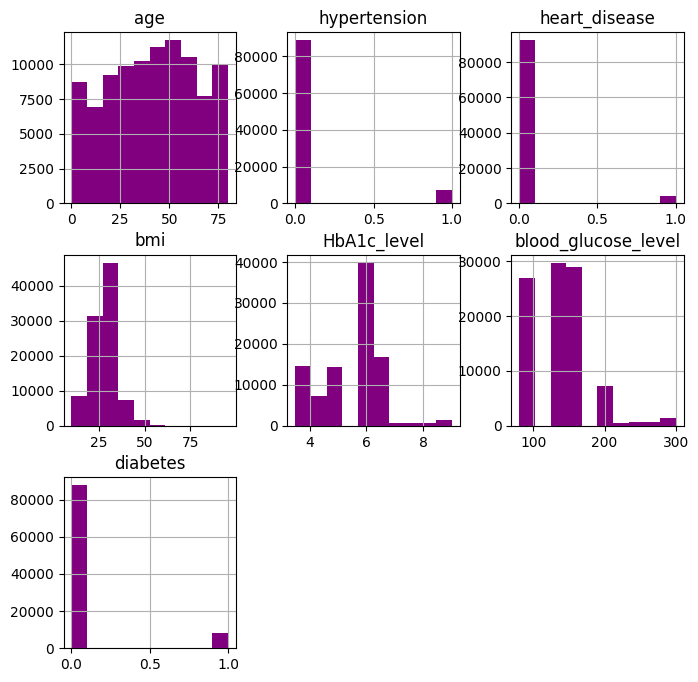

In [15]:
diabetes_data.hist(figsize=(8,8), color='purple')

In [16]:
plt.figure(figsize=(9,7))
correlation=diabetes_data.corr()
sns.heatmap(correlation,annot=True ,fmt='.2f' ,cbar=True ,cmap='summer')

ValueError: could not convert string to float: 'Female'

<Figure size 900x700 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=diabetes_data['gender'],data=diabetes_data ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for gender')
# Pie plot
data_counts = diabetes_data['gender'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for gender')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=diabetes_data['hypertension'],data=diabetes_data ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for hypertension')
# Pie plot
data_counts = diabetes_data['hypertension'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for hypertension')
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=diabetes_data['heart_disease'],data=diabetes_data ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for heart_disease')
# Pie plot
data_counts = diabetes_data['heart_disease'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for heart_disease')
plt.show()

In [1]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Countplot
sns.countplot(x=diabetes_data['smoking_history'],data=diabetes_data ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for smoking_history')
# Pie plot
data_counts = diabetes_data['smoking_history'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for smoking_history')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))
# Countplot
sns.countplot(x=diabetes_data['diabetes'],data=diabetes_data ,palette='magma' ,ax=ax[0])
ax[0].set_title(f'Countplot for diabetes')
# Pie plot
data_counts = diabetes_data['diabetes'].value_counts()
ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))
ax[1].set_title(f'Pie plot for diabetes')

In [ ]:
print(diabetes_data['age'].mean())

**Average range of people with diabetes in age 41**



In [ ]:
blood_glucose_level_above_70_and_less_than_100 = diabetes_data[(diabetes_data['blood_glucose_level'] <= 100) & (diabetes_data['blood_glucose_level'] >= 70)]
blood_glucose_level_above_70_and_less_than_100['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')
plt.title('normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L)')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

**The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended ** **bold text**

In [ ]:
blood_glucose_level_above_200=diabetes_data[diabetes_data['blood_glucose_level']>=200]
blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')
plt.title(' the blood glucose concentration are above 200 mg/dl ,mean that the patient is diabetic')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

**A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes.**

In [ ]:
Normal_HbA1c_level=diabetes_data[diabetes_data['HbA1c_level']<=5.7]
Normal_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')
plt.title(' Normal_HbA1c_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Count of patient')
plt.show()

In [ ]:
diabetic_HbA1c_level=diabetes_data[diabetes_data['HbA1c_level']>=6.5]
diabetic_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')
plt.title('diabetic_HbA1c_level')
plt.xlabel('HbA1c_level')
plt.ylabel('Count of patient')
plt.show()

**Is hypertension more common in males or females?
A greater percentage of men (50%) have high blood pressure than women (44%)**


***note that the number of females in this data set is 56161 ,and male is 39967 ***

In [ ]:
 plt.figure(figsize=(6, 3))
sns.countplot(x=diabetes_data['gender'], hue=diabetes_data['hypertension'], data=diabetes_data ,palette='vlag' )
plt.title('countplot of male and female with respect to hypertension')
plt.show()

**Worldwide, an estimated 17.7 million more men than women have diabetes mellitus.**

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x=diabetes_data['gender'], hue=diabetes_data['diabetes'], data=diabetes_data ,palette='vlag' )
plt.title('countplot of male and female with respect to diabetes')
plt.show()

** regular smokers have a 15-30% higher risk of developing diabetes**

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x=diabetes_data['smoking_history'], hue=diabetes_data['diabetes'], data=diabetes_data ,palette='vlag' )
plt.title('countplot of smoking history with respect to diabetes')
plt.show()

# **Data preprocessing**

In [5]:
#converting categorical data into numerical data
encoder=LabelEncoder()
diabetes_data['gender']=encoder.fit_transform(diabetes_data['gender'])
diabetes_data['smoking_history']=encoder.fit_transform(diabetes_data['smoking_history'])

In [6]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# **Spliting Data**

In [7]:
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [9]:
X_train.shape,X_test.shape,X.shape

((80000, 8), (20000, 8), (100000, 8))

# **LogisticRegression Model**

In [35]:
lr=LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [36]:
y_predection=lr.predict(X_test)

In [37]:
lr_accuracy = accuracy_score(y_test, y_predection)
lr_conf_matrix = confusion_matrix(y_test, y_predection)
lr_classification_rep = classification_report(y_test, y_predection)

In [38]:
print(f'lr_Accuracy: {lr_accuracy:.2f}')
print('\nlr_Confusion Matrix:')
print(lr_conf_matrix)
print('\nlr_Classification Report:')
print(lr_classification_rep)

lr_Accuracy: 0.96

lr_Confusion Matrix:
[[18128   164]
 [  660  1048]]

lr_Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



****Checking for the over and under fiting ****

In [26]:
print("Training Score:",lr.score(X_train,y_train)*100,'%')
print("Testing Score:",lr.score(X_test,y_test)*100,'%')

Training Score: 95.93192573716782 %
Testing Score: 95.69942797711909 %


# **SVM Model**

In [ ]:
svm = SVC(kernel = 'linear', random_state = 20)
svm.fit(X_train, y_train)

In [ ]:
svm_y_predection=svm.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_y_predection)
svm_conf_matrix = confusion_matrix(y_test, svm_y_predection)
svm_classification_rep = classification_report(y_test, svm_y_predection)

In [ ]:
print(f'svm_Accuracy: {svm_accuracy:.2f}')
print('\nsvm_Confusion Matrix:')
print(svm_conf_matrix)
print('\nsvm_Classification Report:')
print(svm_classification_rep)

****Checking for the over and under fiting ****

In [ ]:
print("Training Score:",svm.score(X_train,y_train)*100,'%')
print("Testing Score:",svm.score(X_test,y_test)*100,'%')

# **DecisionTree Model**

In [12]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 5, 10, None],  # depths to consider
    'min_samples_leaf': [1, 2, 4, 6] } # minimum number of samples required at a leaf node

In [13]:
decision_tree_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [14]:
decision_tree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 6]})

In [15]:
y_pred_dt=decision_tree_model.predict(X_test)

In [16]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_classification_rep = classification_report(y_test, y_pred_dt)

In [17]:
print(f'dt_Accuracy: {dt_accuracy:.2f}')
print('\ndt_Confusion Matrix:')
print(dt_conf_matrix)
print('\ndt_Classification Report:')

dt_Accuracy: 0.97

dt_Confusion Matrix:
[[18292     0]
 [  557  1151]]

dt_Classification Report:


**Checking for the over and under fiting**

In [18]:
print("Training Score:",decision_tree_model.score(X_train,y_train)*100,'%')
print("Testing Score:",decision_tree_model.score(X_test,y_test)*100,'%')

Training Score: 97.18 %
Testing Score: 97.21499999999999 %


# **RandomForest Model**

In [12]:
# Define the parameter grid to search
param_grid_ = {
    'n_estimators': [10, 50, 300, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the grid search model
random_forest_model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_, cv=2, n_jobs=-1)


In [13]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
y_pred_rf=random_forest_model.predict(X_test)

In [15]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_classification_rep = classification_report(y_test, y_pred_rf)

In [16]:
print(f'rf_Accuracy: {rf_accuracy:.3f}')
print('\nrf_Confusion Matrix:')
print(rf_conf_matrix)
print('\nrf_Classification Report:')
print(rf_classification_rep)

rf_Accuracy: 0.970

rf_Confusion Matrix:
[[18230    62]
 [  532  1176]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



**Checking for the over and under fiting**

In [17]:
print("Training Score:",random_forest_model.score(X_train,y_train)*100,'%')
print("Testing Score:",random_forest_model.score(X_test,y_test)*100,'%')

Training Score: 99.93125 %
Testing Score: 97.03 %


# **Making a Predictive System**

In [19]:
input_data = (1,80.0,0,1,1,25.19,6.6,140)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = decision_tree_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


# **Saving the trained model**

In [20]:
import pickle

In [21]:
filename = 'diabetes_model.sav'
pickle.dump(decision_tree_model, open(filename, 'wb'))

In [22]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [23]:
input_data = (1,80.0,0,1,1,25.19,6.6,140)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [24]:
for column in X.columns:
  print(column)

gender
age
hypertension
heart_disease
smoking_history
bmi
HbA1c_level
blood_glucose_level


In [25]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load your trained model (make sure the path is accessible from your Jupyter Notebook)
#model = pickle.load(open('rf.pkl', 'rb'))
@app.route('/')
def home():
    return "Welcome to the Diabetes Prediction API"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    print(data["gender"])
    features = [data['gender'], data['age'], data['hypertension'], data['heart_disease'],
                data['smoking_history'], data['bmi'], data['HbA1c_level'], data['blood_glucose_level']]
    prediction = rf.predict([features])
    return jsonify({'diabetes_prediction': int(prediction[0])})

from werkzeug.serving import run_simple
run_simple('localhost', 8000, app)

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://localhost:8000
INFO:werkzeug:Press CTRL+C to quit


In [27]:
import pickle
filename = 'encoder.sav'
pickle.dump(encoder, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('encoder.sav', 'rb'))

In [28]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(decision_tree_model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))